#THE SPARKS FOUNDATION- Data Science & Business Analytics Internship
**Author: Moumita Chakraborty**
# Task 1: Predict the percentage of a student based on the no. of study hours.
##What will be predicted score if a student studies for 9.25 hrs/ day?
## Strategy:
<ul>
<li>Step 1 - Importing the impotant libraries and dataset </li>
<li>Step 2 - Dataset visualization </li>
<li>Step 3 - Data preparation </li>
<li>Step 4 - Training the algorithm </li>
<li>Step 5 - Visualizing the model</li>
<li>Step 6 - Making predcitions</li>
<li>Step 7 - Model evaluation</li>
</ul>
Algorithm used: Linear Regression

##Step 1: Importing the required libraries and dataset

In [84]:
#importing required librabries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [85]:
url="http://bit.ly/w-data" #data available in this url
dataset= pd.read_csv(url)

In [86]:
print(dataset.shape)


(25, 2)


In [87]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##Step 2: Dataset Visualization

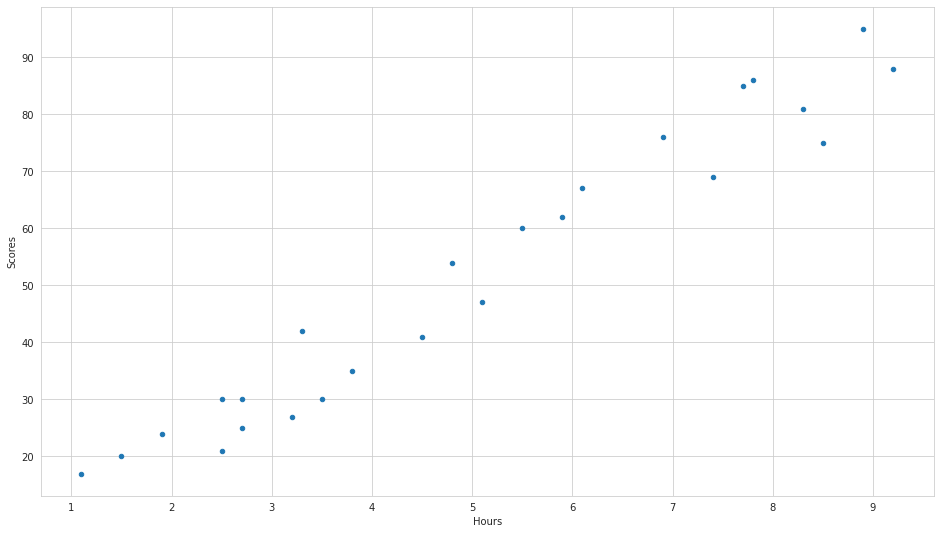

In [89]:
dataset.plot(kind="scatter",x='Hours', y='Scores')
plt.pyplot.show()

In [90]:
dataset.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Step 3: Dataset Preparation

In [91]:
#dividing the data into "attribute"(inputs) and "labels"(outputs)
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,1].values

In [92]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=50)

## Step 4: Training the Model

In [93]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 5: Visualize the model

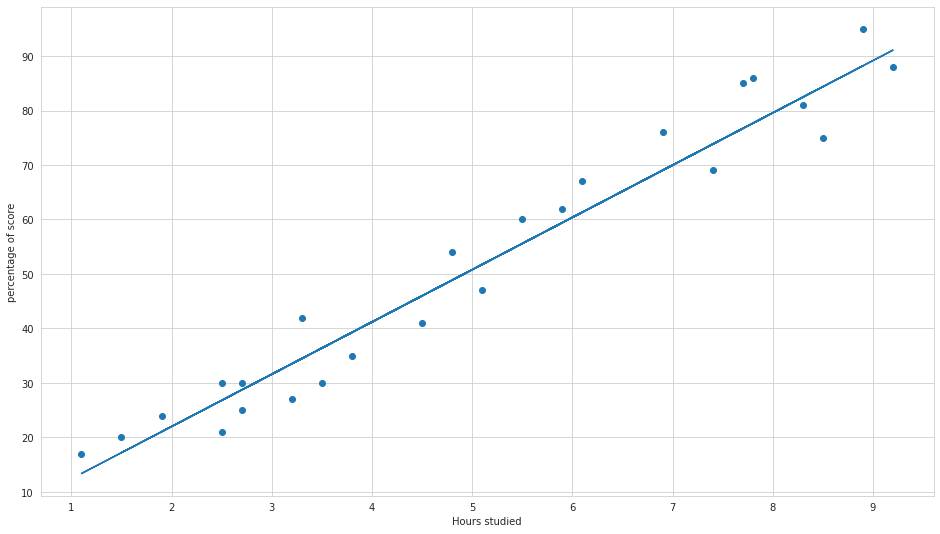

In [105]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
#plotting for the training data
plt.pyplot.scatter(x,y)
plt.pyplot.plot(x,line)
plt.pyplot.xlabel('Hours studied')
plt.pyplot.ylabel('percentage of score')
plt.pyplot.grid
plt.pyplot.show()

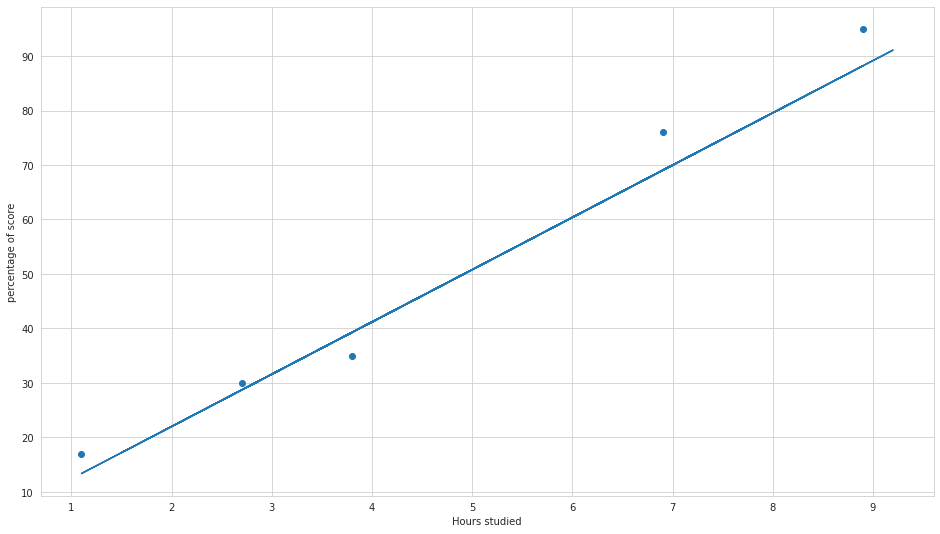

In [106]:
#plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.pyplot.scatter(x_test, y_test)
plt.pyplot.plot(x,line)
plt.pyplot.xlabel('Hours studied')
plt.pyplot.ylabel('percentage of score')
plt.pyplot.grid
plt.pyplot.show()

## Step 6: Making Prediction

In [95]:
y_pred=reg.predict(x_test) #predicting the scores

In [96]:
#comaring the actual vs predicted value
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


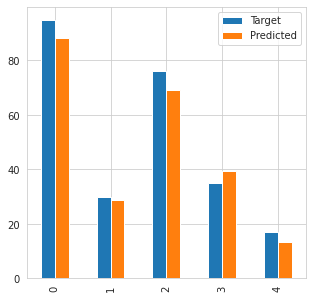

In [101]:
#ploting the histogram to depict the difference between the actual and predicted value
actual_predicted.plot(figsize=(5,5), kind='bar')
plt.pyplot.show()

In [103]:
#scores of the training and testing
print("Training score :", reg.score(x_train,y_train))
print("Testing score :", reg.score(x_test,y_test))


Training score : 0.9444169959416537
Testing score : 0.9710141413299419


In [104]:
#testing with given query
hour=9.25
s=reg.predict([[hour]])
print("If a student studies for {} hours per day he/she will score {} % in exam".format(hour,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam


## Step 7: Model Evaluation

In [99]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:',r2_score(y_test, y_pred ))

Mean Absolute error: 4.5916495300630285
R2 score: 0.971014141329942
